In [114]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心5個  5クラス問題
                  cluster_std = .8, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

In [115]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

plt.set_cmap(plt.cm.gist_ncar)

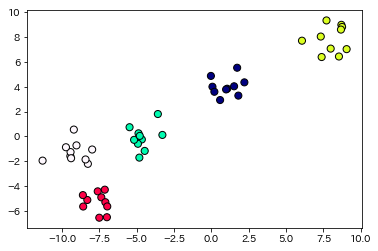

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [117]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, contor=True, cmap=plt.get_cmap()):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10, cmap=cmap)
    if contor:
        plt.contour(XX, YY, Z, colors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [118]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1) # n_neighbors=1 として最近傍法とする

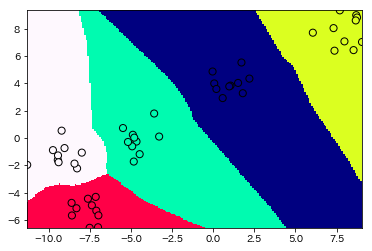

In [119]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf, contor=False) # 境界線の描画

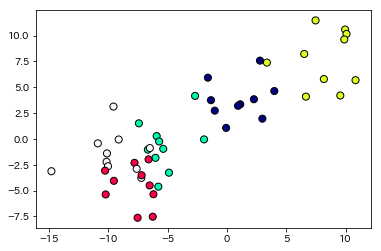

In [120]:
X, y = make_blobs(n_samples=50, # 20個生成
                  n_features=2, # 2次元
                  centers=5,    # クラスタ中心2個
                  cluster_std =2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

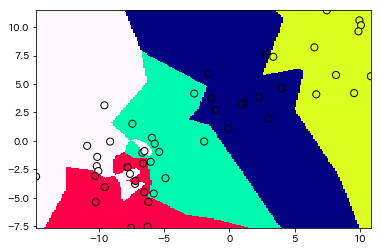

In [121]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf, contor=False) # 境界線の描画

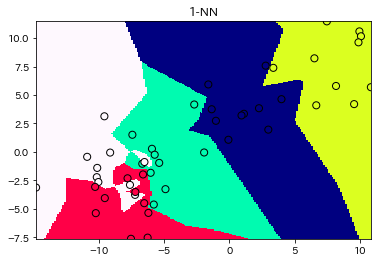

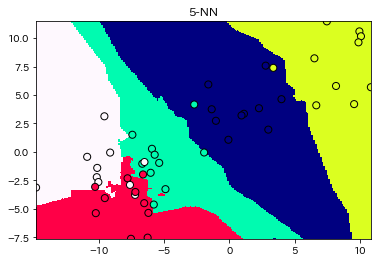

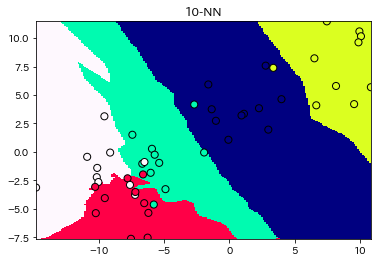

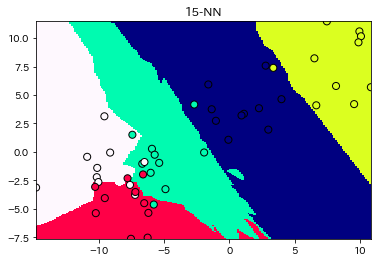

In [122]:
for n in [1, 5, 10, 15]:
    clf.set_params(n_neighbors=n).fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plotBoundary(X, clf, contor=False)
    plt.title("{0}-NN".format(n))
    plt.show()

In [123]:
# 実際のデータに対して行ってみる
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [124]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]
X_train

array([[  1.00500000e+01,   1.75300000e+01,   6.44100000e+01, ...,
          6.49900000e-02,   2.89400000e-01,   7.66400000e-02],
       [  1.08000000e+01,   2.19800000e+01,   6.87900000e+01, ...,
          7.48500000e-02,   2.96500000e-01,   7.66200000e-02],
       [  1.61400000e+01,   1.48600000e+01,   1.04300000e+02, ...,
          1.12900000e-01,   2.77800000e-01,   7.01200000e-02],
       ..., 
       [  9.43600000e+00,   1.83200000e+01,   5.98200000e+01, ...,
          5.05200000e-02,   2.45400000e-01,   8.13600000e-02],
       [  9.72000000e+00,   1.82200000e+01,   6.07300000e+01, ...,
          0.00000000e+00,   1.90900000e-01,   6.55900000e-02],
       [  1.15100000e+01,   2.39300000e+01,   7.45200000e+01, ...,
          9.65300000e-02,   2.11200000e-01,   8.73200000e-02]])

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

array([[  1.00500000e+01,   1.75300000e+01,   6.44100000e+01, ...,
          6.49900000e-02,   2.89400000e-01,   7.66400000e-02],
       [  1.08000000e+01,   2.19800000e+01,   6.87900000e+01, ...,
          7.48500000e-02,   2.96500000e-01,   7.66200000e-02],
       [  1.61400000e+01,   1.48600000e+01,   1.04300000e+02, ...,
          1.12900000e-01,   2.77800000e-01,   7.01200000e-02],
       ..., 
       [  9.43600000e+00,   1.83200000e+01,   5.98200000e+01, ...,
          5.05200000e-02,   2.45400000e-01,   8.13600000e-02],
       [  9.72000000e+00,   1.82200000e+01,   6.07300000e+01, ...,
          0.00000000e+00,   1.90900000e-01,   6.55900000e-02],
       [  1.15100000e+01,   2.39300000e+01,   7.45200000e+01, ...,
          9.65300000e-02,   2.11200000e-01,   8.73200000e-02]])

In [126]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [127]:
clf.score(X_train, y_train) # 近傍法なので100%

1.0

In [128]:
clf.score(X_test, y_test)

0.91228070175438591

In [129]:
n_range = range(1,20) # k-NN の k を変えてみる
scores = []
for n in n_range:
    clf.set_params(n_neighbors=n).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(n, score) 
    scores.append(score)
scores = np.array(scores)

1 0.912280701754
2 0.894736842105
3 0.912280701754
4 0.921052631579
5 0.938596491228
6 0.938596491228
7 0.947368421053
8 0.947368421053
9 0.964912280702
10 0.947368421053
11 0.964912280702
12 0.964912280702
13 0.964912280702
14 0.964912280702
15 0.964912280702
16 0.964912280702
17 0.964912280702
18 0.964912280702
19 0.964912280702


(0.8, 1)

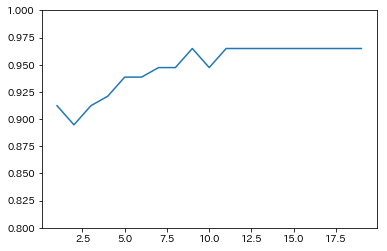

In [130]:
plt.plot(n_range, scores)
plt.ylim(0.8, 1)

In [131]:
n_range[np.argmax(scores)]

9

In [132]:
clf = neighbors.RadiusNeighborsClassifier() # ある指定された半径に入ったサンプルで多数決を取る。
clf.fit(X_train, y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=1.0,
             weights='uniform')

In [133]:
n_range = [2000, 4000, 8000]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test, y_test)
    print(n, score) 
# スケーリングしていないので性能が出ないのが当たり前

2000 0.605263157895
4000 0.587719298246
8000 0.587719298246


In [134]:
# MinMaxでスケーリングしてみる
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
clf.fit(X_train_scale, y_train) # スケーリングしたもので学習

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=8000,
             weights='uniform')

In [135]:
X_test_scale = scaler.transform(X_test)

In [136]:
n_range = [3,4,5,6,7]
for n in n_range:
    clf.radius = n
    score = clf.score(X_test_scale, y_test)
    print(n, score) 
# スケーリングしてもダメだった。　よってこの識別器はこのデータに対してはあまり良くない。

3 0.587719298246
4 0.587719298246
5 0.587719298246
6 0.587719298246
7 0.587719298246


In [137]:
# 今度はスケーリングしたデータに対してk-NNをしてみる k=NNは識別に距離を使うのでスケーリングは大事
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [138]:
n_range = range(1,20)
scores2 = []
for n in n_range:
    clf.n_neighbors = n
    score = clf.score(X_test_scale, y_test)
    print(n, score) 
    scores2.append(score)
scores2 = np.array(scores2)

1 0.947368421053
2 0.938596491228
3 0.947368421053
4 0.956140350877
5 0.956140350877
6 0.982456140351
7 0.964912280702
8 0.973684210526
9 0.973684210526
10 0.982456140351
11 0.973684210526
12 0.973684210526
13 0.973684210526
14 0.973684210526
15 0.973684210526
16 0.973684210526
17 0.973684210526
18 0.973684210526
19 0.973684210526


(0.8, 1)

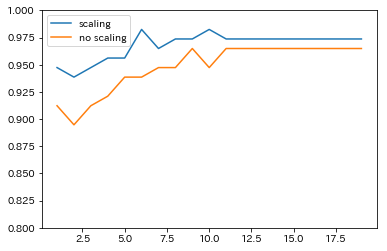

In [139]:
plt.plot(n_range, scores2, label="scaling")
plt.plot(n_range, scores, label="no scaling")
plt.legend(loc='best')
plt.ylim(0.8, 1)

以下は講義に関係ない

In [140]:
# k-NNに対して普通に標準化してはどうか
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [141]:
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
n_range = range(1, 20)
scores2_mean = []
scores2_std = []
for n in n_range:
    clf.set_params(n_neighbors=n).fit(X_train_scale, y_train)
    score = cross_val_score(clf, X_test_scale, y_test, cv=5) # Stratified 5-Fold cross validation
    print(score)
    scores2_mean.append(score.mean())
    scores2_std.append(score.std())
scores2 = np.array(scores2)

[ 0.95833333  0.91666667  0.90909091  0.86363636  0.86363636]
[ 0.83333333  0.95833333  0.90909091  0.86363636  0.86363636]
[ 0.95833333  0.91666667  0.95454545  0.90909091  0.90909091]
[ 0.95833333  0.83333333  0.95454545  0.90909091  0.86363636]
[ 0.95833333  0.83333333  1.          0.95454545  0.90909091]
[ 0.95833333  0.79166667  1.          0.95454545  0.81818182]
[ 0.95833333  0.875       0.95454545  0.95454545  0.86363636]
[ 0.95833333  0.83333333  0.95454545  0.95454545  0.81818182]
[ 1.          0.875       0.95454545  0.95454545  0.90909091]
[ 0.95833333  0.83333333  1.          0.95454545  0.81818182]
[ 1.          0.91666667  0.95454545  0.95454545  0.86363636]
[ 1.          0.91666667  1.          0.95454545  0.86363636]
[ 1.          0.91666667  1.          0.95454545  0.86363636]
[ 1.          0.91666667  1.          0.95454545  0.86363636]
[ 1.          0.91666667  1.          0.95454545  0.86363636]
[ 1.          0.91666667  1.          0.95454545  0.86363636]
[ 1.    

(0.8, 1)

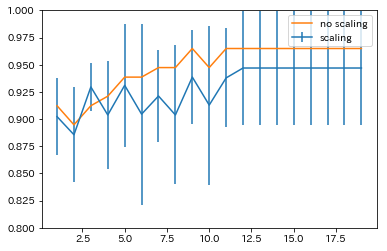

In [144]:
plt.errorbar(n_range, scores2_mean, yerr=scores2_std, label="scaling")
plt.plot(n_range, scores, label="no scaling")
plt.legend(loc='best')
plt.ylim(0.8, 1)

In [145]:
X_train_scale.mean(axis=0)

array([ -8.97694617e-16,  -3.35165351e-15,   3.23355506e-15,
        -2.22727819e-15,  -1.46512838e-15,   5.31740403e-16,
         6.61497719e-16,   4.76053873e-16,  -5.68678194e-15,
         6.94804409e-16,   4.90450171e-17,   5.76827963e-16,
         8.10706813e-16,   1.82881793e-16,   1.79160716e-15,
         4.15540618e-16,   3.25502751e-16,   6.02265490e-16,
        -1.51771148e-16,   1.34580991e-15,  -4.28960896e-16,
         4.92402212e-16,  -1.51795548e-15,   1.32494748e-16,
         5.92337534e-15,  -4.70369317e-16,  -1.36923440e-15,
         2.56327316e-16,  -2.12333204e-15,   1.99242332e-15])

In [146]:
X_train_scale.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [147]:
# PCA　無相関化してみる

In [148]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)

In [149]:
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [150]:
n_range = range(1, 20)
scores2_mean = []
scores2_std = []
for n in n_range:
    clf.set_params(n_neighbors=n).fit(X_train_pca, y_train)
    score = cross_val_score(clf, X_test_pca, y_test, cv=5) # Stratified 5-Fold cross validation
    print(score)
    scores2_mean.append(score.mean())
    scores2_std.append(score.std())

[ 0.79166667  0.625       0.68181818  0.72727273  0.86363636]
[ 0.79166667  0.70833333  0.72727273  0.81818182  0.86363636]
[ 0.75        0.75        0.72727273  0.72727273  0.81818182]
[ 0.79166667  0.75        0.72727273  0.77272727  0.86363636]
[ 0.70833333  0.70833333  0.68181818  0.72727273  0.77272727]
[ 0.75        0.75        0.72727273  0.77272727  0.81818182]
[ 0.625       0.66666667  0.68181818  0.72727273  0.81818182]
[ 0.625       0.75        0.72727273  0.77272727  0.77272727]
[ 0.625       0.70833333  0.63636364  0.77272727  0.68181818]
[ 0.66666667  0.75        0.63636364  0.77272727  0.68181818]
[ 0.625       0.70833333  0.63636364  0.72727273  0.72727273]
[ 0.66666667  0.75        0.63636364  0.72727273  0.77272727]
[ 0.625       0.66666667  0.63636364  0.72727273  0.72727273]
[ 0.66666667  0.66666667  0.63636364  0.72727273  0.77272727]
[ 0.625       0.66666667  0.59090909  0.68181818  0.72727273]
[ 0.625       0.66666667  0.59090909  0.72727273  0.72727273]
[ 0.625 

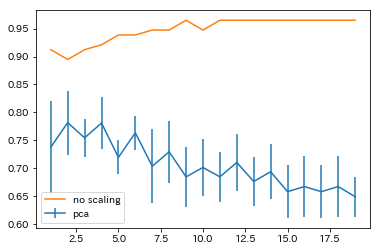

In [151]:
plt.errorbar(n_range, scores2_mean, yerr=scores2_std, label="pca")
plt.plot(n_range, scores, label="no scaling")
plt.legend(loc='best')
#plt.ylim(0.8, 1) 

In [ ]:
# 何故識別能力が下がったのか...